In [103]:
import networkx as nx
import matplotlib.pyplot as plt
import math

In [104]:
def show_graph(G, pos=None, title='', labels={}) :
    if pos is None:
        pos = nx.spring_layout(G)
    nx.draw(
        G, # Graf NetworkX
        pos, # Posisi node
        with_labels=True, # Menampilkan nama node
        labels=labels, # Menampilkan label setiap node
        node_color='red', # Warna node
        node_size=2000, # Ukuran node
        font_color="white", # Warna font label node
        font_weight="bold", # Ketebalan font label node
        width=5
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels, # Data weight
        font_color='blue', # Warna font label edge
        font_weight="bold", # Berat font label edge
        font_size=12, # Ukuran font label edge 

    )
    plt.margins(0.2) # Memberikan margin pada plot
    plt.title(title) # Menampilkan judul graf jika diberikan
    plt.show()


In [105]:
pos = {
    'A': (0, 1),
    'B': (1, 2),
    'C': (1, 0),
    'D': (2, 3),
    'E': (2, 1.5),
    'F': (2, 0)
}

In [106]:
G = nx.DiGraph()

In [107]:
edges = [
    ('A', 'B', 0), ('A', 'C', 0),
    ('B', 'D', 0), ('B', 'E', 0),
    ('C', 'E', 0), ('C', 'F', 0),
    ('E', 'D', 0), ('E', 'F', 0)
]
G.add_weighted_edges_from(edges)

In [108]:
print("Elemen pada Graf:")
print("Daftar Node pada Graf:", G.nodes())
print("Daftar Edge pada Graf:", G.edges())
print("Jumlah Node pada Graf", G.number_of_nodes())
print("Jumlah Edge pada Graf", G.number_of_edges())

Elemen pada Graf:
Daftar Node pada Graf: ['A', 'B', 'C', 'D', 'E', 'F']
Daftar Edge pada Graf: [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'F')]
Jumlah Node pada Graf 6
Jumlah Edge pada Graf 8


In [109]:
labels = {node: node for node in G.nodes()}
labels['A'] = 'A\nStart'
labels['F'] = 'F\nGoal'

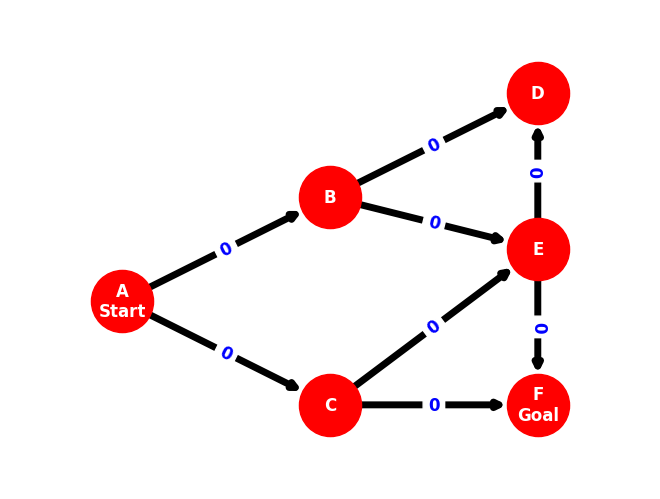

In [110]:
show_graph(G, pos=pos, labels=labels)

In [ ]:
# Fungsi untuk menghitung jarak terpendek di antara dua node
def euclidean_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Fungsi untuk menghitung heuristik jarak terpendek dari node ke node tujuan (tanpa menghitung weightnya)
def greedy_best_first_search(G, start, goal, heuristics):
    from queue import PriorityQueue
    visited = set()
    pq = PriorityQueue()
    pq.put((heuristics[start], start, [start]))

    while not pq.empty():
        (h, current, path) = pq.get()
        if current == goal:
            return path
        if current not in visited:
            visited.add(current)
            for neighbor in G.neighbors(current):
                if neighbor not in visited:
                    pq.put((heuristics[neighbor], neighbor, path + [neighbor]))
    return None


In [122]:
G_european = nx.Graph()
edges_european = [
    ('Arad', 'Zerind', 75), ('Zerind', 'Oradea', 71), ('Oradea', 'Sibiu', 151),
    ('Arad', 'Sibiu', 140), ('Arad', 'Timisoara', 118), ('Timisoara', 'Lugoj', 111),
    ('Lugoj', 'Mehadia', 70), ('Mehadia', 'Drobeta', 75), ('Drobeta', 'Craiova', 120),
    ('Craiova', 'Pitesti', 138), ('Craiova', 'Rimnicu Vilcea', 146), 
    ('Rimnicu Vilcea', 'Sibiu', 80), ('Sibiu', 'Fagaras', 99),
    ('Fagaras', 'Bucharest', 211), ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Pitesti', 'Bucharest', 101), ('Bucharest', 'Giurgiu', 90),
    ('Bucharest', 'Urziceni', 85), ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86), ('Urziceni', 'Vaslui', 142),
    ('Vaslui', 'Iasi', 92), ('Iasi', 'Neamt', 87)
]

G_european.add_weighted_edges_from(edges_european)

In [123]:
europe_position = {
    'Arad': (91, 492), 'Zerind': (108, 531), 'Oradea': (130, 571), 'Sibiu': (207, 457),
    'Timisoara': (94, 410), 'Lugoj': (165, 379), 'Mehadia': (168, 339),
    'Drobeta': (165, 299), 'Craiova': (200, 293), 'Rimnicu Vilcea': (233, 410),
    'Fagaras': (305, 449), 'Pitesti': (320, 368), 'Bucharest': (400, 327),
    'Giurgiu': (375, 270), 'Urziceni': (456, 350), 'Hirsova': (509, 444),
    'Eforie': (562, 442), 'Vaslui': (509, 444), 'Iasi': (473, 506), 'Neamt': (406, 537)
}

In [ ]:
# Fungsi untuk menghitung jarak terpendek dari node ke node tujuan (tanpa menghitung weightnya)
europe_heuristics = {
    city: euclidean_distance(pos, europe_position['Bucharest'])
    for city, pos in europe_position.items()
}

# menghilangkan weight pada edge
G_european_unweighted = G_european.copy()
for u, v in G_european_unweighted.edges():
    del G_european_unweighted[u][v]['weight']


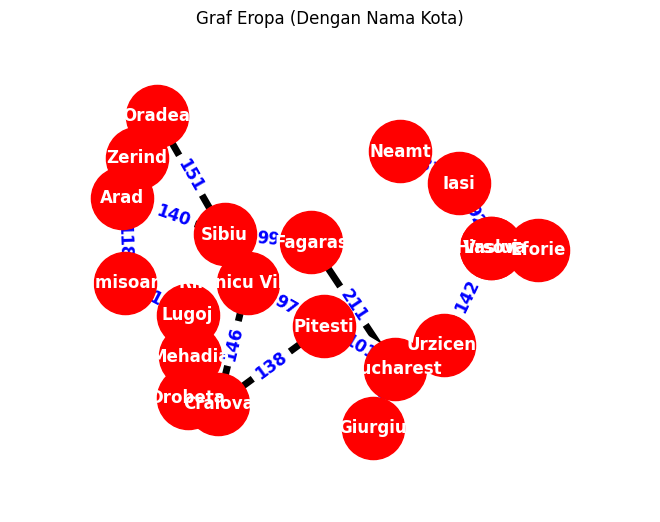

['Arad', 'Sibiu', 'Fagaras', 'Bucharest']

In [133]:
path_european = greedy_best_first_search(G_european_unweighted, 'Arad', 'Bucharest', europe_heuristics)

show_graph(G_european, pos=europe_position, title='Graf Eropa (Dengan Nama Kota)', labels={node: node for node in G_european.nodes})
path_european

In [127]:
G_java = nx.Graph()
edges_java = [
    ('Jakarta', 'Bandung', 270), ('Jakarta', 'Cirebon', 327),
    ('Bandung', 'Cirebon', 120), ('Bandung', 'Yogyakarta', 373),
    ('Cirebon', 'Semarang', 305), ('Cirebon', 'Yogyakarta', 210),
    ('Semarang', 'Yogyakarta', 109), ('Semarang', 'Surakarta', 97),
    ('Surakarta', 'Yogyakarta', 60), ('Semarang', 'Surabaya', 369),
    ('Surabaya', 'Surakarta', 370), ('Surabaya', 'Malang', 94)
]

G_java.add_weighted_edges_from(edges_java)


In [128]:
java_positions = {
    'Jakarta': (100, 300), 'Bandung': (150, 250), 'Cirebon': (250, 300),
    'Semarang': (400, 280), 'Surabaya': (600, 260), 'Malang': (620, 200),
    'Yogyakarta': (350, 200), 'Surakarta': (420, 210)
}

In [129]:
heuristics_java = {
    city: euclidean_distance(pos, java_positions['Malang'])
    for city, pos in java_positions.items()
}

G_java_unweighted = G_java.copy()
for u, v in G_java_unweighted.edges():
    del G_java_unweighted[u][v]['weight']

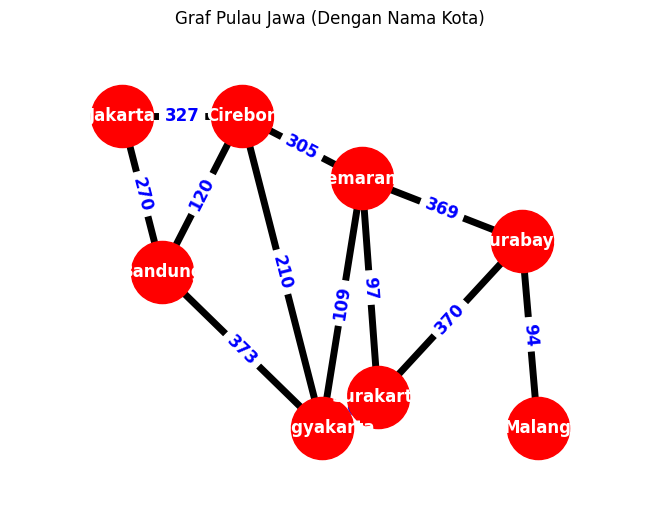

['Bandung', 'Yogyakarta', 'Surakarta', 'Surabaya', 'Malang']

In [132]:
path_java = greedy_best_first_search(G_java_unweighted, 'Bandung', 'Malang', heuristics_java)

show_graph(G_java, pos=java_positions, title='Graf Pulau Jawa (Dengan Nama Kota)', labels={node: node for node in G_java.nodes})
path_java